In [68]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import io
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Import the Input function for better model definition
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import to_categorical

In [69]:
# import matlab dataset with scipy.io
dataset = io.loadmat(r"C:\Users\11\Documents\Machine Learning\09 Projects\02 hoda softmax\data\Data_hoda_full.mat")

In [70]:
print(dataset['Data'].shape)
print(dataset['labels'].shape)

(60000, 1)
(60000, 1)


In [71]:
# dataset was created for matlab and we have 1 extra dimension
# np.squeeze will remove that extra dimension
# X = np.squeeze(dataset['Data'])
# Y = np.squeeze(dataset['labels'])
# print(f"Data shape is = {X.shape}" "\n" f"Labe shape is{Y.shape}")

#280 Data from X
this picture label is number : 3


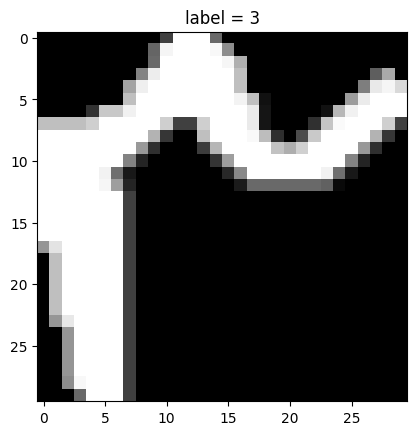

In [72]:
# now lets see some image from data
numd = 280
plt.imshow(X[numd] , cmap = 'grey')
plt.title(f"label = {Y[numd]}")
print(f"#{numd} Data from X")
print(f"this picture label is number : {Y[numd]}")

In [73]:
for i in range(len(X)):
    X[i] = cv.resize(X[i], (30 , 30 ))

#280 Data from X
this picture label is number : 3


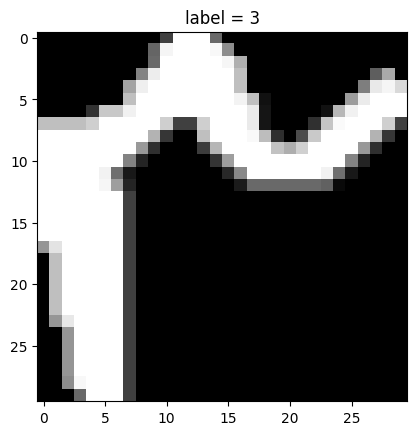

In [74]:
# now lets see some image from data
numd = 280
plt.imshow(X[numd] , cmap = 'grey')
plt.title(f"label = {Y[numd]}")
print(f"#{numd} Data from X")
print(f"this picture label is number : {Y[numd]}")

In [75]:
#Split data
## 🚀 Step 1: Split off the Test Set (5% of the total data)
# We split the data into a Test set (5%) and a temporary set (Train+Validation, 95%).

TEST_SIZE = 0.05  # 5% for the Test set
RANDOM_SEED = 42  # Set a seed for reproducibility

# First split: (95%)_temp vs (5%)_test
X_temp, X_test, Y_temp, Y_test = train_test_split(
    X, Y,
    test_size=TEST_SIZE,
    random_state=RANDOM_SEED,
    shuffle=True,             # Shuffle the data
    stratify=Y                # Ensure label distribution is maintained in Y_test and Y_temp
)

print("--- Initial Split Results ---")
print(f"X_temp (Train+Validation 95%): {X_temp.shape[0]} samples")
print(f"X_test (Test 5%): {X_test.shape[0]} samples\n")

--- Initial Split Results ---
X_temp (Train+Validation 95%): 57000 samples
X_test (Test 5%): 3000 samples



In [76]:
## 🎯 Step 2: Split the Temporary Set into Train (90%) and Validation (5%)
# The remaining 95% (X_temp) needs to be split further into 90% (Train) and 5% (Validation).
# We must calculate the proportion of Validation out of the *temporary* set.

# Desired final size of Validation set: 5% of Total
# Size of the temporary set: 95% of Total
# Ratio for the second split: (5% / 95%)
VAL_FROM_TEMP_RATIO = 0.05 / 0.95

# Second split: (90%)_train vs (5%)_validation
X_train, X_validation, Y_train, Y_validation = train_test_split(
    X_temp, Y_temp,
    test_size=VAL_FROM_TEMP_RATIO, # Use the calculated ratio (approx 0.05263)
    random_state=RANDOM_SEED,
    shuffle=True,
    stratify=Y_temp                # Ensure label distribution is maintained in Y_train and Y_validation
)

print("--- Final Split Results ---")
print(f"X_train (90%): {X_train.shape[0]} samples")
print(f"X_validation (5%): {X_validation.shape[0]} samples")
print(f"X_test (5%): {X_test.shape[0]} samples")
print(f"Total Samples: {X_train.shape[0] + X_validation.shape[0] + X_test.shape[0]}")

--- Final Split Results ---
X_train (90%): 53999 samples
X_validation (5%): 3001 samples
X_test (5%): 3000 samples
Total Samples: 60000


In [77]:
print(X_train[3].shape)
print(X_train[5002].shape)

(30, 30)
(30, 30)


In [78]:
# Model Definition (Following Simple Structure) ---

IMAGE_SIZE = 30
NUM_CLASSES = 10 # Assuming 10 possible labels (e.g., digits 0-9)
CHANNEL_COUNT = 1 # Grayscale images have 1 channel
INPUT_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, CHANNEL_COUNT)

model = Sequential([
    # Explicitly define the input layer
    Input(shape=INPUT_SHAPE),
    
    # 1. CONVOLUTIONAL LAYER (Filter)
    # The input shape is now handled by the Input layer, so we remove it here.
    Conv2D(32, (3, 3), activation='relu'),

    # 2. POOLING LAYER
    # Reduces dimensionality by taking the maximum value over a 2x2 window
    MaxPooling2D((2, 2)),

    # 3. FLATTEN LAYER
    # Converts the 2D feature maps into a 1D feature vector for the Dense layer
    Flatten(),

    # 4. OUTPUT DENSE LAYER (Softmax Output)
    # The final classification layer with a softmax activation
    Dense(NUM_CLASSES, activation='softmax')
])


In [79]:
# Model Compilation ---

# Use Adam optimizer and Categorical Crossentropy loss (suitable for softmax/one-hot encoding)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary (to confirm the layers)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        62,730 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,050 (246.29 KB)

 Trainable params: 63,050 (246.29 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
#  Model Training ---

print("\n--- Starting Training ---")
history = model.fit(
    X_train, Y_train,
    epochs=5,             # Number of times to iterate over the entire training dataset
    batch_size=32,        # Number of samples per gradient update
    validation_data=(X_validation, Y_validation), # Monitor performance on the test set during training
    verbose=1
)
print("--- Training Complete ---\n")


--- Starting Training ---


ValueError: Invalid dtype: object

In [ ]:
# --- 6. Evaluation and Results ---

print("Evaluating model performance on the test set...")
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

print("\n--- Training History Summary ---")
# Show how accuracy and loss changed over the training epochs
for i, (acc, val_acc, loss, val_loss) in enumerate(zip(
    history.history['accuracy'], history.history['val_accuracy'],
    history.history['loss'], history.history['val_loss']
)):
    print(f"Epoch {i+1}: Train Acc={acc:.4f}, Val Acc={val_acc:.4f}, Train Loss={loss:.4f}, Val Loss={val_loss:.4f}")
